<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده مهندسی برق و کامپیوتر
            </font>
			<p></p>
			<font color=blue>
مبانی هوش محاسباتی
            </font>
			<br />
			<br />
بهار ۱۴۰۱/۱۴۰۲
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
تکلیف کامپیوتری اول
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
علیرضا ابره فروش
            </div>
		</font>
		<font color=green size=6>
			<br />
			<div align=center>	
9816603
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
	</font>
</div>

# 1

### پيش پردازش داده هاي ورودي

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import recall_score, accuracy_score, f1_score

In [98]:
cross_validation_df = pd.read_csv("clean1.data/clean1.data", delimiter = ",", header = None)
train_df = pd.read_csv("clean2.data/clean2.data", delimiter = ",", header = None)

In [99]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0


In [100]:
def normalize(df):
    normalized_df = df.copy()
    columns_to_normalize = [i for i in range(2, 168)]
    min_max_scaler = preprocessing.MinMaxScaler()
    normalized_df[columns_to_normalize] = min_max_scaler.fit_transform(normalized_df[columns_to_normalize])
    normalized_df = pd.DataFrame(normalized_df)
    return normalized_df

train_df_normalized = normalize(train_df)

### پياده سازي تابع رگرسيون لاجيستيك

In [101]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def getCost(y, y_hat):
    epsilon = 1e-5
    cost = -np.mean(y * (np.log(y_hat + epsilon)) + (1 - y) * np.log(1 - y_hat + epsilon))
    return cost

def addBias(X):
    n_samples, n_features = X.shape
    weights = np.random.random(n_features)
    if ("bias" not in X.columns):
        vector_of_ones = np.ones(n_samples)
        X.insert(0, "bias", vector_of_ones)
        r = np.random.random()
        weights = np.append([r], weights)
    return X, weights

def logistic_regression(X, y, learning_rate, num_iterations, add_intercept):
    n_samples, n_features = X.shape
    cost_history = np.zeros(num_iterations,)
    if (add_intercept is True):
        X, weights = addBias(X)
    else:
        weights = np.random.random(n_features)
    for i in range(num_iterations):
        z = np.dot(X, weights)
        sig_z = sigmoid(z)
        sig_z_y = sig_z - y
        weights = weights - learning_rate * np.dot(X.T, sig_z_y)
        cost_history[i] = getCost(y, sig_z)
    
    return weights, cost_history

### آموزش و تست مدل

In [102]:
X_train = train_df_normalized.iloc[:, 2: -1].copy()
y_train = train_df_normalized.iloc[:, -1].copy()

#### نرخ یادگیری کوچک

In [103]:
weights1, cost_history1 = logistic_regression(X_train, y_train, 0.00001, 50, True)

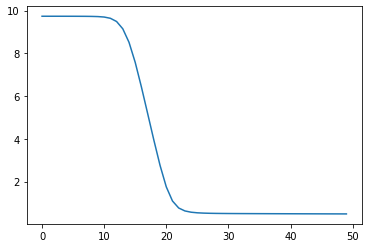

In [104]:
plt.plot(cost_history1)

#### نرخ یادگیری بزرگ

In [105]:
weights2, cost_history2 = logistic_regression(X_train, y_train, 0.1, 50, True)

<ipython-input-101-8f4061c857a4>:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))


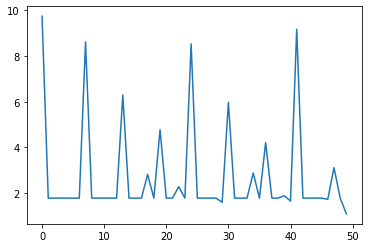

In [106]:
plt.plot(cost_history2)

###### هنگامی که نرخ یادگیری کوچک است مدل همگرا به نقطه بهینه می‌شود. همانطور که می‌بینیم در این حالت بدون نوسان تابع هزینه‌‌ی ما کاهش می‌یابد. درحالی که وقتی نرخ یادگیری بزرگ است مدل نوسانی عمل می‌کند و به بهینه‌ای همگرا نمی‌شود.

In [112]:
cross_validation_df_normalized = normalize(cross_validation_df)
X_cross_validation = cross_validation_df_normalized.iloc[:, 2: -1].copy()
X_cross_validation, cvw = addBias(X_cross_validation)
y_cross_validation = cross_validation_df_normalized.iloc[:, -1].copy()

In [116]:
def predict(X, weights):
    z = np.dot(X, weights)
    y_hat = np.round(sigmoid(z))
    #y_hat = sigmoid(z)
    return y_hat

In [117]:
y_hat = predict(X_cross_validation, weights1)

### محاسبه‌ي پارامترهاي ذكر شده و توضيح آن‌ها

In [ ]:
rec = recall_score(y_true = y_cross_validation, y_pred = y_hat)
acc = accuracy_score(y_true = y_cross_validation, y_pred = y_hat)
f1 = f1_score(y_true = y_cross_validation, y_pred = y_hat)
print(rec, acc, f1)

0.004830917874396135 0.542016806722689 0.009090909090909092


# 2

In [138]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns = iris['feature_names'] + ['target'])

In [148]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [147]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### الف

In [142]:
#train_test_split from scratch
def trainTestSplit(df, ratio):
    new_df = df.copy()
    new_df = new_df.sample(frac = 1)
    total_rows = new_df.shape[0]
    train_size = int(total_rows * ratio)
    train = new_df[0: train_size]
    test = new_df[train_size: ]
    return train, test

In [146]:
feature_names = ["sepal length (cm)",	"sepal width (cm)",	"petal length (cm)", "petal width (cm)"]
target_name = ["target"]
# split the data set into train and test
iris_train, iris_test = trainTestSplit(iris_df, 0.8)
X_train = iris_train[feature_names]
y_train = iris_train[target_name]
X_test = iris_test[feature_names]
y_test = iris_test[target_name]

In [149]:
y_train.nunique()

target    3
dtype: int64

In [ ]:
y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)